In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy.constants import hbar
#import pydux.lib.simulations.ms_gate_time_evolution as _ms

In [11]:
eta=0.12
omega= 2*np.pi*100e3
epsilo=4*eta*omega
m=1
lamda=eta**2*omega**2/epsilo
kappa=eta**2*omega**2/(epsilo**2)
delta_phi=0
t_gate=4*np.pi/epsilo

In [3]:
e = Qobj([[0, 0], [0, 1]])
g = Qobj([[1, 0], [0, 0]])

ee = tensor(e,e,qeye(m))
eg = tensor(e,g,qeye(m))
ge = tensor(g,e,qeye(m))
gg = tensor(g,g,qeye(m))
dm_eg=eg*eg.dag()

a=tensor(qeye(2),qeye(2),destroy(m))


In [4]:
def sm(phi):
    sig_phi = sigmax()*np.cos(phi)-sigmay()*np.sin(phi)
    S=tensor(sig_phi,qeye(2),qeye(m))+tensor(qeye(2),sig_phi,qeye(m))
    return S

In [5]:
sm(np.pi/2).eigenstates()

(array([-2.00000000e+00,  0.00000000e+00,  2.66453526e-15,  2.00000000e+00]),
 array([Quantum object: dims = [[2, 2, 1], [1, 1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.5+0.j ]
  [ 0. +0.5j]
  [ 0. +0.5j]
  [-0.5+0.j ]],
        Quantum object: dims = [[2, 2, 1], [1, 1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.        +0.j        ]
  [-0.46092558+0.53623466j]
  [ 0.46092558-0.53623466j]
  [ 0.        +0.j        ]],
        Quantum object: dims = [[2, 2, 1], [1, 1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[-0.70710678]
  [ 0.        ]
  [ 0.        ]
  [-0.70710678]],
        Quantum object: dims = [[2, 2, 1], [1, 1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.5+0.j ]
  [ 0. -0.5j]
  [ 0. -0.5j]
  [-0.5+0.j ]]], dtype=object))

In [41]:
def alpha(t, delta):
    t0=0
    first_frac = -1j*omega/delta
    exp1 = np.exp(1j*delta_phi/2)
    exp2 = np.exp(-1j*delta*(t0+t)/2)
    end_sin = np.sin(delta*t/2)
    alpha= first_frac*exp1*exp2*end_sin
    return alpha

In [44]:
deltas = np.logspace(-1, 5, 10)
ts=np.linspace(0, t_gate*4, 200)
alphas = [alpha(ts, delta) for delta in deltas]

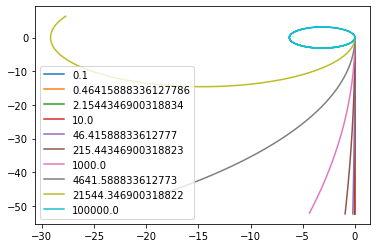

In [45]:
for kk in range(len(alphas)):
    plt.plot(np.real(alphas[kk]), np.imag(alphas[kk]), label= deltas[kk])
plt.legend()

In [8]:
def disp():
    d=np.exp(sm(np.pi/2)*(alpha(t_gate)*a.dag()-alpha(t_gate).conj()*a))
    return d    

In [14]:
out= np.linalg.eig(disp()*(ee))
out

(array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]),
 array([[1. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
        [0. +0.j, 1. +0.j, 0. +0.j, 0.5+0.j],
        [0. +0.j, 0. +0.j, 1. +0.j, 0.5+0.j],
        [0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j]]))

In [13]:
t=np.linspace(0, t_gate,50)
output=out*alpha(t)
x=output.real
y=output.imag

c:\users\mwstr\anaconda3\envs\code3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
c:\users\mwstr\anaconda3\envs\code3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
c:\users\mwstr\anaconda3\envs\code3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


ValueError: could not broadcast input array from shape (4,4) into shape (4)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x,y,color="b")
plt.show()

In [ ]:
r=c_spin(np.pi/2)*dm_ee
r.eigenenergies()

In [ ]:
phi=np.pi/2
c_spin(phi).eigenstates()

In [ ]:
import numpy as np
import matplotlib.pyplot as _plt
import pydux.lib.analysis.conversions as _conv
from math import*

In [ ]:
eta=0.12
omega= 2*np.pi*100e3
epsilo=4*eta*omega
m_phonon=20
lamda=eta**2*omega**2/epsilo
kappa=eta**2*omega**2/(epsilo**2)

In [ ]:
def alpha(t):
    return (eta*omega/epsilo)*(np.exp(-1j*epsilo*t)-1)
def gamma(t):
    return (lamda*t-kappa*np.sin(epsilo*t))

In [ ]:
def population(t):
    factor1=np.exp(-16*(abs(alpha(t)))**2*(m_phonon+1/2))
    factor2=4*np.cos(4*gamma(t))*np.exp(-4*(abs(alpha(t)))**2*(m_phonon+1/2))
    p2=1/8*(3+factor1+factor2)
    p1=1/4*(1-factor1)
    p0=1/8*(3+factor1-factor2)
    return p2,p1,p0

In [ ]:
time=100
times = np.linspace(0, time*_conv.us_to_s, 1000)
fig, ax = _plt.subplots(figsize=(6, 4))
ax.plot(times*_conv.s_to_us,population(times)[0],label="p2")
ax.plot(times*_conv.s_to_us,population(times)[1],label="p1")
ax.plot(times*_conv.s_to_us,population(times)[2],label="p0")
ax.set_xlabel("time(us)", fontsize=12)
ax.set_ylabel(r"internal ground state population", fontsize=12)
ax.tick_params(direction="in", labelsize=15)
_plt.legend()
_plt.show()

In [ ]:
np.linspace(-2.5,5.5,5)